<a href="https://colab.research.google.com/github/maviayten/fsvm/blob/main/fsvm_kanser.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


In [6]:
def hesapla_uyelik(X, y):
    memberships = np.ones_like(y, dtype=float)
    for label in np.unique(y):
        class_indices = np.where(y == label)[0]
        memberships[class_indices] = 1.0 / (1.0 + np.std(X[class_indices]))
    return memberships



In [7]:
class BulanikSVM(SVC):
    def __init__(self, C=1.0, kernel="linear", bulanik_agirliklar=None, **kwargs):
        super().__init__(C=C, kernel=kernel, **kwargs)
        self.bulanik_agirliklar = bulanik_agirliklar

    def fit(self, X, y):
        if self.bulanik_agirliklar is not None:
            ornek_agirliklari = self.bulanik_agirliklar
        else:
            ornek_agirliklari = np.ones_like(y, dtype=float)
        super().fit(X, y, sample_weight=ornek_agirliklari)
        return self



In [8]:
cancer = load_breast_cancer()
X = cancer.data[:, :2]
y = cancer.target


In [9]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

fuzzy_membership = hesapla_uyelik(X_train, y_train)

fsvm_model = BulanikSVM(C=1.0, kernel="linear", bulanik_agirliklar=fuzzy_membership)
fsvm_model.fit(X_train, y_train)

y_pred = fsvm_model.predict(X_test)



In [10]:
dogruluk = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"Doğruluk (Accuracy): {dogruluk:.2f}")
print(f"Kesinlik (Precision): {precision:.2f}")
print(f"Duyarlılık (Recall): {recall:.2f}")
print(f"F1 Skoru: {f1:.2f}")
print(f"Karışıklık Matrisi (Confusion Matrix):\n{cm}")



Doğruluk (Accuracy): 0.91
Kesinlik (Precision): 0.90
Duyarlılık (Recall): 0.95
F1 Skoru: 0.93
Karışıklık Matrisi (Confusion Matrix):
[[ 52  11]
 [  5 103]]


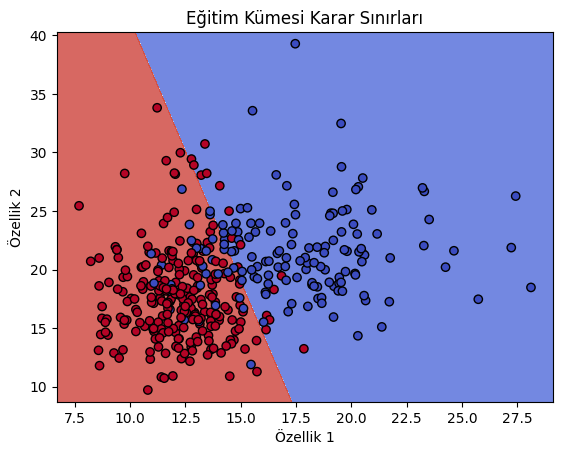

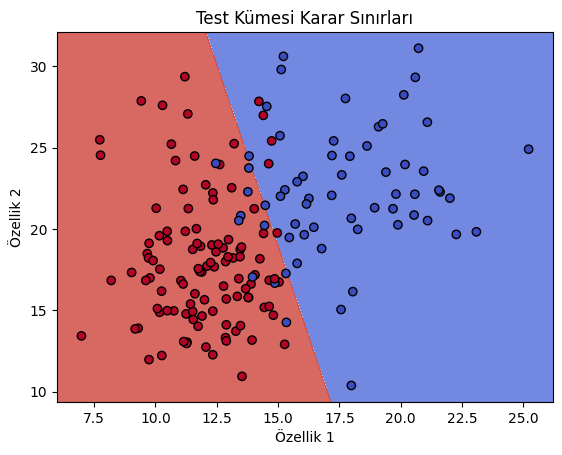

In [13]:
def karar_sinirlarini_ciz(model, X, y, baslik="Karar Sınırları"):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k", cmap=plt.cm.coolwarm)
    plt.xlabel("Özellik 1")
    plt.ylabel("Özellik 2")
    plt.title(baslik)
    plt.show()

karar_sinirlarini_ciz(fsvm_model, X_train, y_train, baslik="Eğitim Kümesi Karar Sınırları")
karar_sinirlarini_ciz(fsvm_model, X_test, y_test, baslik="Test Kümesi Karar Sınırları")
